In [13]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
import pydotplus

In [14]:
#conda install pydotplus

In [15]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [16]:
#iris.data

In [17]:
#new.target

In [18]:
print(df.head())
print(y[0:5])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0]


# Fitting on whole data

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)               

DecisionTreeClassifier()

In [20]:
#The following is required only if you want to print the tree

from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydot
features = list(df.columns)
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
#conda install pydot

In [22]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)  #This function generates a GraphViz representation of the decision tree,
                                                                                            #which is then written into `out_file`

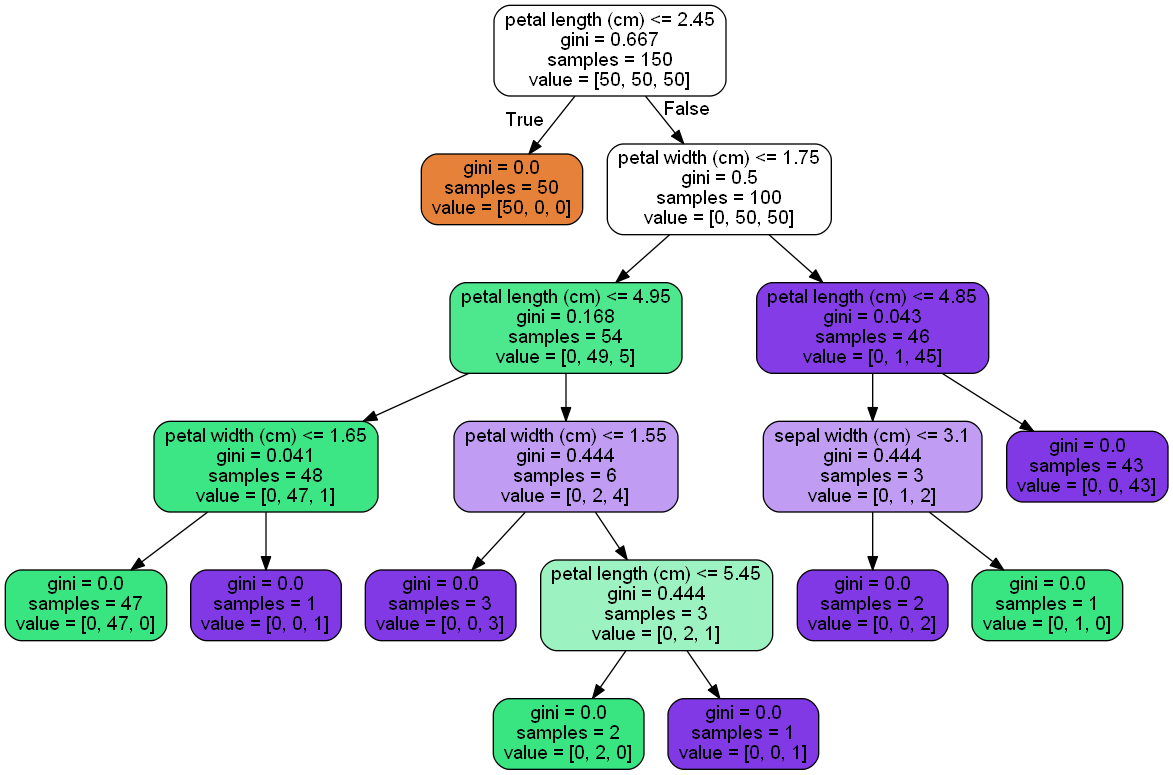

In [23]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [24]:
print(dtree.feature_importances_)
print(features)

#here we see that petal length and petal width has got higher importance

[0.         0.01333333 0.56405596 0.42261071]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# Fitting on train data

In [25]:
from sklearn.model_selection import train_test_split
X=df
Y=y
tr_x, ts_x, tr_y, ts_y=train_test_split(X,Y, test_size=0.3,random_state=123)

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(tr_x,tr_y)

DecisionTreeClassifier()

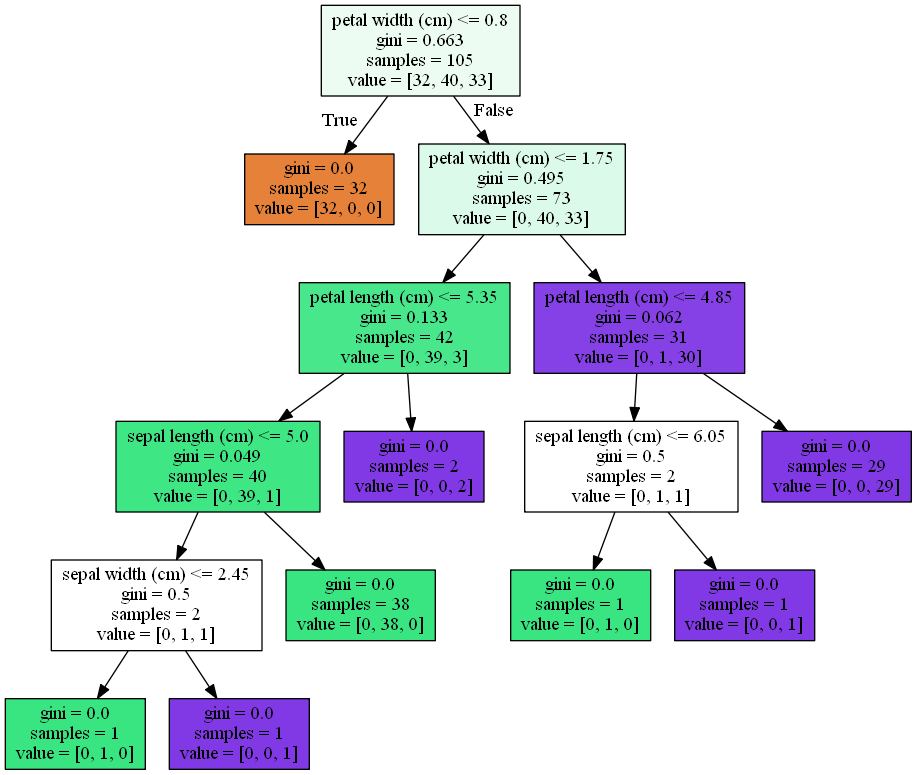

In [27]:
from IPython.display import Image  
from io import StringIO 
from sklearn.tree import export_graphviz
import pydot 
features = list(tr_x.columns)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=False)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [28]:
print(dtree.feature_importances_)
print(features)

#We see less importance to petal length and all the importance to petal width

[0.02800191 0.01435996 0.06543706 0.89220107]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [29]:
ts_x[0:1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
72,6.3,2.5,4.9,1.5


In [30]:
ts_y

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [31]:
pred=dtree.predict(ts_x)
pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [32]:
from sklearn.metrics import classification_report, accuracy_score
accuracy_score(ts_y, pred)

0.9333333333333333

In [33]:
print(classification_report(ts_y,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.77      1.00      0.87        10
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



In [ ]:
# Use function to calculate multiclass AUC, ROC